In [24]:
#==================================================
# Library Import
#==================================================

import math
import argparse
import numpy as np
import pandas as pd
import scipy
from tqdm.notebook import tqdm

import torch
import torch.autograd as autograd
import pyro.ops.stats as pyrostats

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.lines as mlines
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [3]:
datas = [0, 0, 0]
datas[0] = np.load("./SampleData_4.0_0.75_2000.npy")[:,0]
datas[1] = np.load("./SampleData_4.0_1.00_2000.npy")[:,0]
datas[2] = np.load("./SampleData_4.0_1.25_2000.npy")[:,0]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


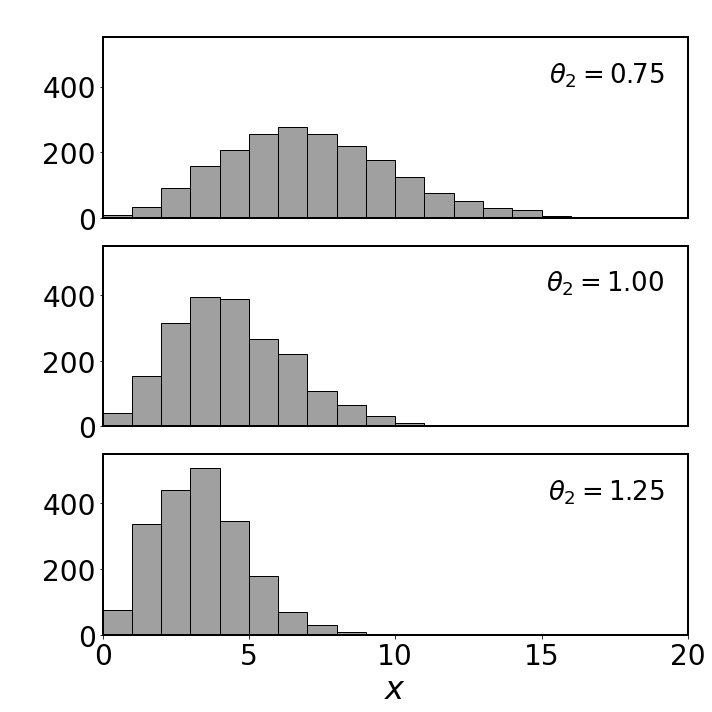

In [4]:
def ax_setting(ax, i):    
    framewidth = 2.0
    ax.spines["top"].set_linewidth(framewidth)
    ax.spines["left"].set_linewidth(framewidth)
    ax.spines["right"].set_linewidth(framewidth)
    ax.spines["bottom"].set_linewidth(framewidth)
    
    ax.xaxis.set_major_locator(plt.MultipleLocator(5))
    ax.yaxis.set_major_locator(plt.MultipleLocator(200))
    ax.tick_params(axis='x', labelsize=28)
    ax.tick_params(axis='y', labelsize=28)
    
    ax.set_xlim(0, 20.0)
    ax.set_ylim(0, 550.0)
    ax.set_xlabel(r"$x$", fontsize=32)
    ax.set_ylabel(r" ", fontsize=32)
    if i < 2:
        ax.set_xlabel(r"", fontsize=32)
        ax.set_xticks([])
    

fig, axs = plt.subplots(3, 1, figsize=(10, 10))
for i in range(3):
    ax_setting(axs[i], i)
sns.histplot(datas[0], binwidth=1, color="grey", label=r'$\theta_2=0.75$', ax=axs[0])
axs[0].set_title(r" ", fontsize=32)
leg = axs[0].legend(loc="upper right", frameon=False, fontsize=26)
[ item.set_visible(False) for item in leg.legendHandles ]
sns.histplot(datas[1], binwidth=1, color="grey", label=r'$\theta_2=1.00$', ax=axs[1])
leg = axs[1].legend(loc="upper right", frameon=False, fontsize=26)
[ item.set_visible(False) for item in leg.legendHandles ]
sns.histplot(datas[2], binwidth=1, color="grey", label=r'$\theta_2=1.25$', ax=axs[2])
leg = axs[2].legend(loc="upper right", frameon=False, fontsize=26)
[ item.set_visible(False) for item in leg.legendHandles ]

fig.tight_layout()
fig.savefig('../Fig/figure_1.eps', format='eps')


In [96]:
files = [["", "", ""], ["", "", ""]]
files[0][0] = "./Bayes_theta1=4.0_theta2=0.75_numboot=100_dnum=2000_pnum=5000_samples.npy"
files[0][1] = "./FDBayes_theta1=4.0_theta2=0.75_numboot=100_dnum=2000_pnum=5000_samples.npy"
files[0][2] = "./KSDBayes_theta1=4.0_theta2=0.75_numboot=100_dnum=2000_pnum=5000_samples.npy"
files[1][0] = "./Bayes_theta1=4.0_theta2=1.25_numboot=100_dnum=2000_pnum=5000_samples.npy"
files[1][1] = "./FDBayes_theta1=4.0_theta2=1.25_numboot=100_dnum=2000_pnum=5000_samples.npy"
files[1][2] = "./KSDBayes_theta1=4.0_theta2=1.25_numboot=100_dnum=2000_pnum=5000_samples.npy"

postsamples = [[0, 0, 0], [0, 0, 0]]
for i in range(2):
    for j in range(3):
        postsamples[i][j] = np.load(files[i][j])[0,::10]

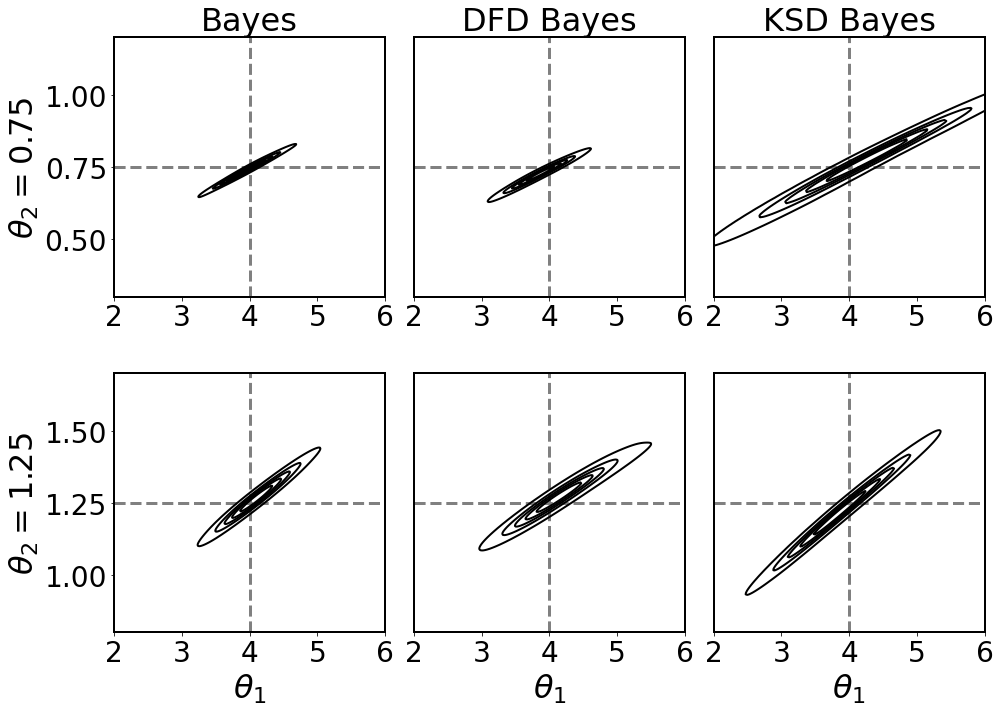

In [105]:
def ax_setting(ax, i, j):
    mpl.rcParams["lines.linewidth"] = 2.0
    
    framewidth = 2.0
    ax.spines["top"].set_linewidth(framewidth)
    ax.spines["left"].set_linewidth(framewidth)
    ax.spines["right"].set_linewidth(framewidth)
    ax.spines["bottom"].set_linewidth(framewidth)
    
    ax.xaxis.set_major_locator(plt.MultipleLocator(1.0))
    ax.yaxis.set_major_locator(plt.MultipleLocator(0.25))
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%1.2f'))
    ax.tick_params(axis='x', labelsize=28)
    ax.tick_params(axis='y', labelsize=28)
    
    if i == 0:
        ax.set_xlim(2.0,6.0)
        ax.set_ylim(0.3,1.2)
        ax.axvline(4.0, color='gray', linestyle='--', linewidth=3)
        ax.axhline(0.75, color='gray', linestyle='--', linewidth=3)
        ax.set_xlabel(r"", fontsize=32)
        if j == 0:
            ax.set_ylabel(r"$\theta_2 = 0.75$", fontsize=32)
        else:
            ax.set_ylabel(r"", fontsize=32)
            ax.set_yticks([])
            
    else:
        ax.set_xlim(2.0,6.0)
        ax.set_ylim(0.8,1.7)
        ax.axvline(4.0, color='gray', linestyle='--', linewidth=3)
        ax.axhline(1.25, color='gray', linestyle='--', linewidth=3)
        ax.set_xlabel(r"$\theta_1$", fontsize=32)
        if j == 0:
            ax.set_ylabel(r"$\theta_2 = 1.25$", fontsize=32)
        else:
            ax.set_ylabel(r"", fontsize=32)
            ax.set_yticks([])
            
    ax.set_title(r" ", fontsize=32)
    

def plot(postsample, ax, bw=0.5):
    sns.kdeplot(x=postsample[:,0], y=postsample[:,1], color="black", bw_method=bw, ax=ax, levels=6)
    

fig, axs = plt.subplots(2, 3, figsize=(14,10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
for i in range(2):
    for j in range(3):
        ax_setting(axs[i][j], i, j)
        plot(postsamples[i][j], axs[i][j], bw=1.0)
        if i == 0:
            if j == 0:
                axs[i][j].set_title("Bayes", fontsize=32)
            elif j == 1:
                axs[i][j].set_title("DFD-Bayes", fontsize=32)
            else:
                axs[i][j].set_title("KSD-Bayes", fontsize=32)

fig.tight_layout()
fig.savefig('../Fig/figure_2.eps', format='eps')


In [26]:
times = [0, 0, 0]
times[0] = np.load("./ComputationTime_Bayes_theta1=4.0_theta2=0.75_numboot=100_times.npy")
times[1] = np.load("./ComputationTime_FDBayes_theta1=4.0_theta2=0.75_numboot=100_times.npy")
times[2] = np.load("./ComputationTime_KSDBayes_theta1=4.0_theta2=0.75_numboot=100_times.npy")

times[0] = times[0].T
times[1] = times[1].T
times[2] = times[2].T

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


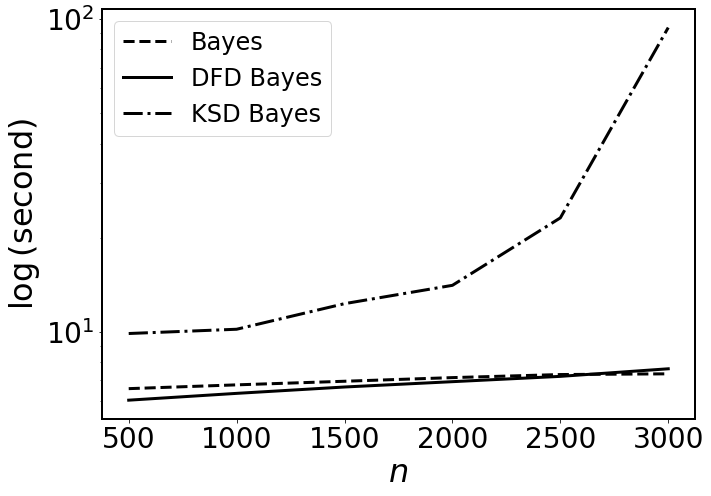

In [31]:
def ax_setting(ax):
    framewidth = 2.0
    ax.spines["top"].set_linewidth(framewidth)
    ax.spines["left"].set_linewidth(framewidth)
    ax.spines["right"].set_linewidth(framewidth)
    ax.spines["bottom"].set_linewidth(framewidth)
    
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%1.1f'))
    ax.tick_params(axis='x', labelsize=28)
    ax.tick_params(axis='y', labelsize=28)
    
    ax.set_xlabel(r"$n$", fontsize=32)
    ax.set_ylabel(r"$\log$(second)", fontsize=32)

Ns = torch.tensor([500, 1000, 1500, 2000, 2500, 3000])

fig, ax = plt.subplots(figsize=(10, 7))
ax_setting(ax)
g1 = sns.lineplot(x=Ns, y=times[0].mean(axis=0), linestyle='--', color="black", linewidth=3, ci="sd", label="Bayes")
g2 = sns.lineplot(x=Ns, y=times[1].mean(axis=0), linestyle='-', color="black", linewidth=3, ci="sd", label="DFD-Bayes")
g3 = sns.lineplot(x=Ns, y=times[2].mean(axis=0), linestyle='-.', color="black", linewidth=3, ci="sd", label="KSD-Bayes")
plt.legend(loc=2, prop={'size': 24}, fontsize=32)
g1.set(yscale='log')
g2.set(yscale='log')
g3.set(yscale='log')

fig.tight_layout()
fig.savefig('../Fig/figure_3.eps', format='eps')


In [17]:
betas = [0, 0]
betas_list = np.load("./CompareBeta_FDBayes_theta1=4.0_theta2=0.75_nboot=100_betas.npy", allow_pickle=True).item()
betas[0] = betas_list['O']
betas[1] = betas_list['L']

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


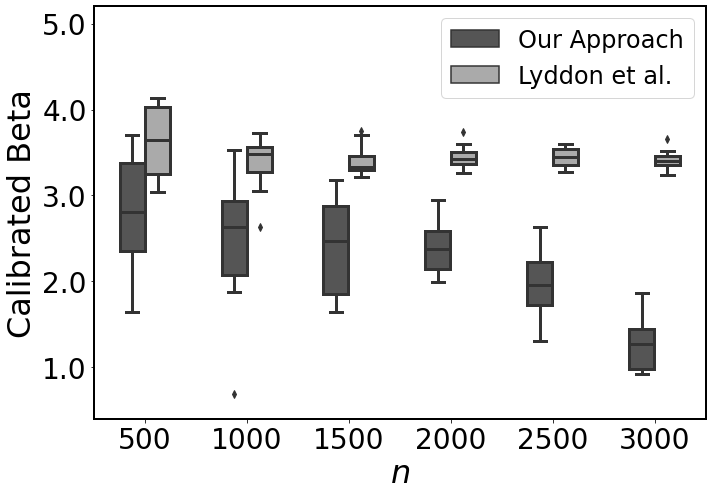

In [33]:
def ax_setting(ax):
    framewidth = 2.0
    ax.spines["top"].set_linewidth(framewidth)
    ax.spines["left"].set_linewidth(framewidth)
    ax.spines["right"].set_linewidth(framewidth)
    ax.spines["bottom"].set_linewidth(framewidth)
    
    ax.tick_params(axis='x', labelsize=28)
    ax.tick_params(axis='y', labelsize=28)
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%1.1f'))
    ax.set_ylim(0.4, 5.2)

    ax.set_xlabel(r"$n$", fontsize=32)
    ax.set_ylabel(r"Calibrated Beta", fontsize=32)

Ns = [500, 1000, 1500, 2000, 2500, 3000]
head = 0
tail = 6
dat1 = np.zeros((tail-head, 10, 2))
dat2 = np.zeros((tail-head, 10, 2))

dat1[:,:,0] = np.array(Ns[head:tail]).reshape((tail-head, 1)).repeat(10, axis=1)
dat1[:,:,1] = betas[0][head:tail, :]
dat2[:,:,0] = np.array(Ns[head:tail]).reshape((tail-head, 1)).repeat(10, axis=1)
dat2[:,:,1] = betas[1][head:tail, :]

df1 = pd.DataFrame(dat1.reshape((10*(tail-head), 2)))
df1.columns =['x','y']
df1['x'] = df1['x'].astype('int')
df1['label'] = ['Our Approach'] * 10*(tail-head)
df2 = pd.DataFrame(dat2.reshape((10*(tail-head), 2)))
df2.columns =['x','y']
df2['x'] = df2['x'].astype('int')
df2['label'] = ['Lyddon et al.'] * 10*(tail-head)
df = pd.concat([df1, df2])

fig, ax = plt.subplots(figsize=(10, 7))
sns.boxplot(x='x', y='y', hue='label', data=df, palette='gray', width=0.5, linewidth=3.0)
ax_setting(ax)
plt.legend(loc=1, prop={'size': 24}, fontsize=32)
fig.tight_layout()

fig.savefig('../Fig/figure_4.eps', format='eps')


In [102]:
boot_minimisers = np.load("FDBayes_theta1=4.0_theta2=0.75_numboot=100_dnum=2000_pnum=5000_bootminimisers_beta=1.9100255966186523.npy")
post_sample = np.load("FDBayes_theta1=4.0_theta2=0.75_numboot=100_dnum=2000_pnum=5000_samples.npy")

post_sample = post_sample[0]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


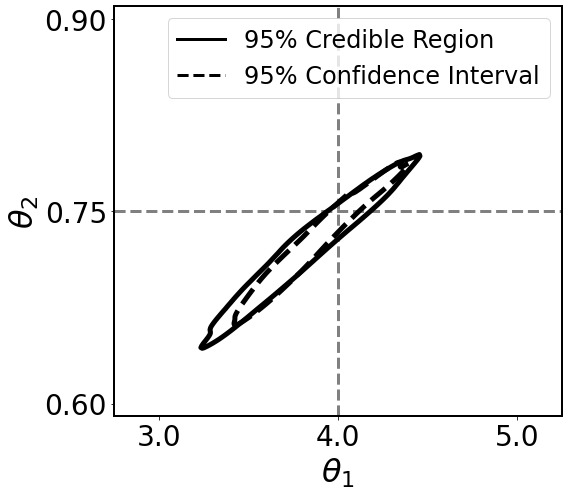

In [149]:
from matplotlib.lines import Line2D

def ax_setting(ax):
    mpl.rcParams["lines.linewidth"] = 2.0
    
    framewidth = 2.0
    ax.spines["top"].set_linewidth(framewidth)
    ax.spines["left"].set_linewidth(framewidth)
    ax.spines["right"].set_linewidth(framewidth)
    ax.spines["bottom"].set_linewidth(framewidth)
    
    ax.xaxis.set_major_locator(plt.MultipleLocator(1.0))
    ax.yaxis.set_major_locator(plt.MultipleLocator(0.15))
    ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%1.1f'))
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%1.2f'))
    ax.tick_params(axis='x', labelsize=28)
    ax.tick_params(axis='y', labelsize=28)
    
    ax.set_xlim(2.75,5.25)
    ax.set_ylim(0.59,0.91)
    ax.axvline(4.0, color='gray', linestyle='--', linewidth=3)
    ax.axhline(0.75, color='gray', linestyle='--', linewidth=3)
    ax.set_xlabel(r"$\theta_1$", fontsize=32)
    ax.set_ylabel(r"$\theta_2$", fontsize=32)

fig, ax = plt.subplots(figsize=(8, 7))
ax_setting(ax)
sns.kdeplot(x=post_sample[::10,0], y=post_sample[::10,1],\
            color="black", linestyles="-", linewidths=5.0, bw_method=0.5, levels=[0.05, 1.0])
sns.kdeplot(x=boot_minimisers[:,0], y=boot_minimisers[:,1],\
            color="black", linestyles="--", linewidths=5.0, bw_method=0.5, levels=[0.05, 1.0])
line1 = Line2D([0,1],[0,1], linestyle='-', linewidth=3.0, color='black')
line2 = Line2D([0,1],[0,1], linestyle='--', linewidth=3.0, color='black')
ax.legend([line1, line2],['95% Credible Region', '95% Confidence Interval'], loc=1, prop={'size': 24}, fontsize=32)
plt.subplots_adjust(left=0.2)
fig.tight_layout()
fig.savefig('../Fig/figure_5.eps', format='eps')